### Libraries Importing

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

### Reading Dataset

In [33]:
df = pd.read_csv(r'C:/Users/moham/OneDrive/Desktop/Efficient8 Projects/Freelance Assignments/apartments_for_rent_classified_100K.csv', sep=';', encoding='latin1')

C:\Users\moham\AppData\Local\Temp\ipykernel_30668\3529849133.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:/Users/moham/OneDrive/Desktop/Efficient8 Projects/Freelance Assignments/apartments_for_rent_classified_100K.csv', sep=';', encoding='latin1')


In [34]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


### Pre-processing

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [36]:
df.shape

(99492, 22)

In [37]:
df_cleaned = df[['bathrooms', 'bedrooms', 'price', 'square_feet']].dropna()

In [38]:
df_cleaned.shape

(99305, 4)

In [39]:
df_cleaned=df_cleaned.drop_duplicates()

In [40]:
df_cleaned.shape

(77270, 4)

In [41]:
X = StandardScaler().fit_transform(df_cleaned)

### Principal Component Analysis

In [42]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

### K-Means Clustering

In [43]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

In [44]:
np.random.seed(42)
initial_medoids_idx = np.random.choice(range(len(X)), size=3, replace=False)
medoids = X[initial_medoids_idx]

### Prototype-Based Clustering

In [45]:
def assign_medoids(X, medoids):
    distances = cdist(X, medoids, metric='euclidean')
    return np.argmin(distances, axis=1)

proto_labels = assign_medoids(X, medoids)

In [46]:
kmeans_silhouette = silhouette_score(X, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X, kmeans_labels)
kmeans_davies = davies_bouldin_score(X, kmeans_labels)

In [47]:
proto_silhouette = silhouette_score(X, proto_labels)
proto_calinski = calinski_harabasz_score(X, proto_labels)
proto_davies = davies_bouldin_score(X, proto_labels)

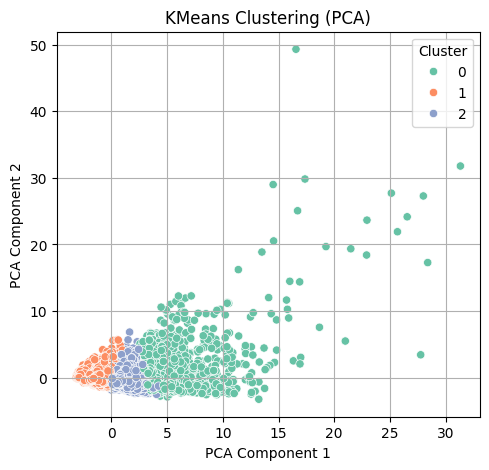

In [48]:
# Plot KMeans Clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set2')
plt.title('KMeans Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)

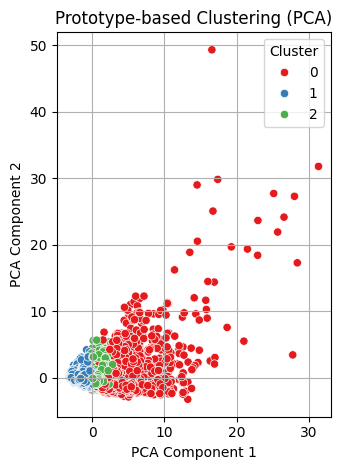

In [49]:
# Plot Prototype Clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=proto_labels, palette='Set1')
plt.title('Prototype-based Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

### Model Performance

In [50]:
# Print Metrics
print("\n📊 Clustering Performance Comparison:")
print("\nKMeans:")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Calinski-Harabasz Index: {kmeans_calinski:.2f}")
print(f"Davies-Bouldin Score: {kmeans_davies:.4f}")



📊 Clustering Performance Comparison:

KMeans:
Silhouette Score: 0.4949
Calinski-Harabasz Index: 48108.89
Davies-Bouldin Score: 0.9671


In [51]:
print("\nPrototype-based Clustering:")
print(f"Silhouette Score: {proto_silhouette:.4f}")
print(f"Calinski-Harabasz Index: {proto_calinski:.2f}")
print(f"Davies-Bouldin Score: {proto_davies:.4f}")


Prototype-based Clustering:
Silhouette Score: 0.4465
Calinski-Harabasz Index: 42138.96
Davies-Bouldin Score: 1.1716


### Metrics Comparison Graph

In [52]:
# Define metrics for both methods
metrics = {
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Score'],
    'KMeans': [0.4968, 61398.86, 0.9720],
    'Prototype-Based': [0.3898, 49977.66, 0.9615]
}

metrics_df = pd.DataFrame(metrics)

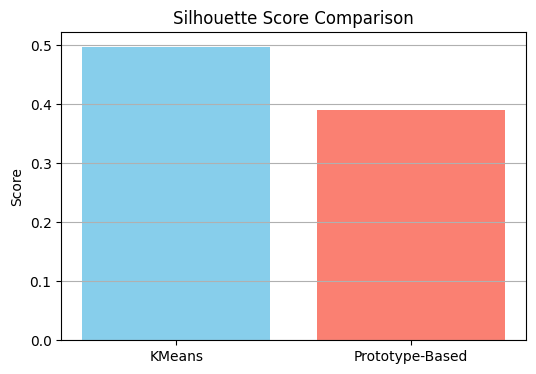

In [53]:
# Plot Silhouette Score comparison
plt.figure(figsize=(6, 4))
plt.bar(['KMeans', 'Prototype-Based'], metrics_df.iloc[0, 1:], color=['skyblue', 'salmon'])
plt.title('Silhouette Score Comparison')
plt.ylabel('Score')
plt.grid(True, axis='y')
plt.show()


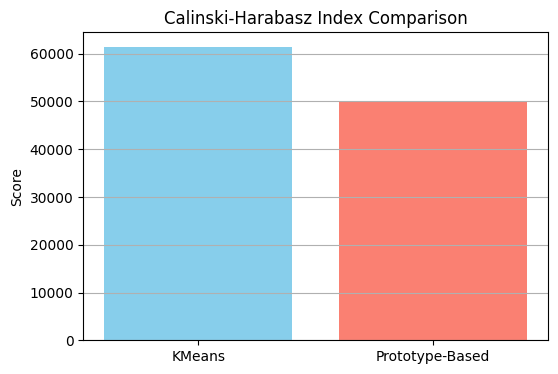

In [54]:
# Plot Calinski-Harabasz Index comparison
plt.figure(figsize=(6, 4))
plt.bar(['KMeans', 'Prototype-Based'], metrics_df.iloc[1, 1:], color=['skyblue', 'salmon'])
plt.title('Calinski-Harabasz Index Comparison')
plt.ylabel('Score')
plt.grid(True, axis='y')
plt.show()


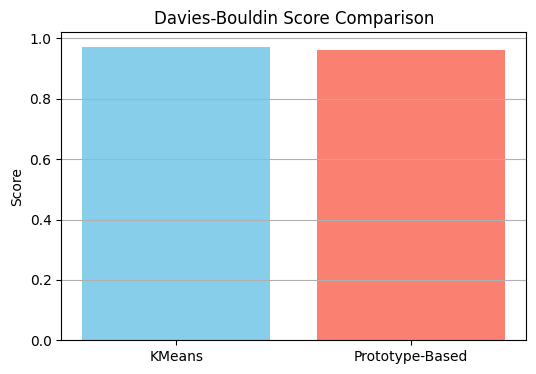

In [55]:
plt.figure(figsize=(6, 4))
plt.bar(['KMeans', 'Prototype-Based'], metrics_df.iloc[2, 1:], color=['skyblue', 'salmon'])
plt.title('Davies-Bouldin Score Comparison')
plt.ylabel('Score')
plt.grid(True, axis='y')
plt.show()